<a href="https://colab.research.google.com/github/chanijung/Deep_Learning_Practice/blob/master/chord_classifier_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classifying events in a chorale into specific chords

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

##Build the input dataframe of our neural net

In [3]:
data_path = '/content/gdrive/My Drive/데이터 분석 강의/jsbach_chorals_harmony.csv'

In [4]:
original_df = pd.read_csv(data_path, header=None)

In [5]:
df = original_df.copy()

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5665 non-null   object
 1   1       5665 non-null   int64 
 2   2       5665 non-null   object
 3   3       5665 non-null   object
 4   4       5665 non-null   object
 5   5       5665 non-null   object
 6   6       5665 non-null   object
 7   7       5665 non-null   object
 8   8       5665 non-null   object
 9   9       5665 non-null   object
 10  10      5665 non-null   object
 11  11      5665 non-null   object
 12  12      5665 non-null   object
 13  13      5665 non-null   object
 14  14      5665 non-null   object
 15  15      5665 non-null   int64 
 16  16      5665 non-null   object
dtypes: int64(2), object(15)
memory usage: 752.5+ KB


In [8]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

##Look over the data

<bound method Figure.get_size_inches of <Figure size 432x288 with 0 Axes>>


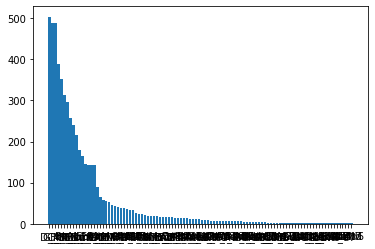

In [9]:
y = df[16].value_counts()
x = y.index
# plt.figure(figsize=(12,9))
print(plt.gcf().get_size_inches)
rects = plt.bar(x,y)


###Set the indices as 'chorale#_event#'

In [10]:
df[0] = df[0].astype(str) + df[1].astype(str)
df = df.set_index(0)
df = df.drop(columns=1)

In [11]:
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,
000106b_1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
000106b_2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
000106b_3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
000106b_4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
000106b_5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
015505b_105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
015505b_106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
015505b_107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M


###Convert non-numeric attributes into numeric values

In [12]:
#Convert column2-13 into Boolean values
df = pd.concat([df, (df.iloc[:,0:12] == 'YES').astype(int)], axis=1, ignore_index=True)
df = df.drop(columns=range(0,12))

In [13]:
df

,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,,,,,,,,,,,,,,,
000106b_1,F,3,F_M,1,0,0,0,0,1,0,0,0,1,0,0
000106b_2,E,5,C_M,1,0,0,0,1,0,0,1,0,0,0,0
000106b_3,E,2,C_M,1,0,0,0,1,0,0,1,0,0,0,0
000106b_4,F,3,F_M,1,0,0,0,0,1,0,0,0,1,0,0
000106b_5,F,2,F_M,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
015505b_105,G,4,G_m,0,0,1,0,0,0,0,1,0,0,1,0
015505b_106,G,3,G_m,0,0,1,0,0,0,0,1,0,1,0,0
015505b_107,C,5,C_M,1,0,0,0,1,0,0,1,0,0,0,0


In [14]:
#One-hot encode the bass pitch and chord label
df = pd.get_dummies(df,prefix=['bass', 'chord'])

In [15]:
#Rename the meter column
df = df.rename(columns={13:"meter"})

In [16]:
df

,meter,15,16,17,18,19,20,21,22,23,24,25,26,bass_A,bass_A#,bass_Ab,bass_B,bass_Bb,bass_C,bass_C#,bass_D,bass_D#,bass_Db,bass_E,bass_Eb,bass_F,bass_F#,bass_G,bass_G#,chord_ A#d,chord_ A#d7,chord_ A_M,chord_ A_M4,chord_ A_M6,chord_ A_M7,chord_ A_d,chord_ A_m,chord_ A_m4,chord_ A_m6,chord_ A_m7,...,chord_ Dbm7,chord_ E_M,chord_ E_M4,chord_ E_M7,chord_ E_d,chord_ E_m,chord_ E_m6,chord_ E_m7,chord_ EbM,chord_ EbM7,chord_ Ebd,chord_ F#M,chord_ F#M4,chord_ F#M7,chord_ F#d,chord_ F#d7,chord_ F#m,chord_ F#m6,chord_ F#m7,chord_ F_M,chord_ F_M4,chord_ F_M6,chord_ F_M7,chord_ F_d,chord_ F_d7,chord_ F_m,chord_ F_m6,chord_ F_m7,chord_ G#M,chord_ G#d,chord_ G#d7,chord_ G#m,chord_ G_M,chord_ G_M4,chord_ G_M6,chord_ G_M7,chord_ G_d,chord_ G_m,chord_ G_m6,chord_ G_m7
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000106b_1,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000106b_2,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000106b_3,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000106b_4,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000106b_5,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
015505b_105,4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
015505b_106,3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
015505b_107,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Extract labels from the dataframe

In [17]:
labels = df.iloc[:,-102:]
df = df.iloc[:,:-102]

In [18]:
labels

,chord_ A#d,chord_ A#d7,chord_ A_M,chord_ A_M4,chord_ A_M6,chord_ A_M7,chord_ A_d,chord_ A_m,chord_ A_m4,chord_ A_m6,chord_ A_m7,chord_ AbM,chord_ Abd,chord_ Abm,chord_ B_M,chord_ B_M4,chord_ B_M7,chord_ B_d,chord_ B_d7,chord_ B_m,chord_ B_m6,chord_ B_m7,chord_ BbM,chord_ BbM7,chord_ Bbd,chord_ Bbm,chord_ Bbm6,chord_ C#M,chord_ C#M4,chord_ C#M7,chord_ C#d,chord_ C#d6,chord_ C#d7,chord_ C#m,chord_ C#m7,chord_ C_M,chord_ C_M4,chord_ C_M6,chord_ C_M7,chord_ C_d6,...,chord_ Dbm7,chord_ E_M,chord_ E_M4,chord_ E_M7,chord_ E_d,chord_ E_m,chord_ E_m6,chord_ E_m7,chord_ EbM,chord_ EbM7,chord_ Ebd,chord_ F#M,chord_ F#M4,chord_ F#M7,chord_ F#d,chord_ F#d7,chord_ F#m,chord_ F#m6,chord_ F#m7,chord_ F_M,chord_ F_M4,chord_ F_M6,chord_ F_M7,chord_ F_d,chord_ F_d7,chord_ F_m,chord_ F_m6,chord_ F_m7,chord_ G#M,chord_ G#d,chord_ G#d7,chord_ G#m,chord_ G_M,chord_ G_M4,chord_ G_M6,chord_ G_M7,chord_ G_d,chord_ G_m,chord_ G_m6,chord_ G_m7
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000106b_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000106b_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000106b_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000106b_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000106b_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
015505b_105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
015505b_106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
015505b_107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df

,meter,15,16,17,18,19,20,21,22,23,24,25,26,bass_A,bass_A#,bass_Ab,bass_B,bass_Bb,bass_C,bass_C#,bass_D,bass_D#,bass_Db,bass_E,bass_Eb,bass_F,bass_F#,bass_G,bass_G#
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000106b_1,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
000106b_2,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
000106b_3,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
000106b_4,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
000106b_5,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
015505b_105,4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
015505b_106,3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
015505b_107,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [20]:
analysis_data = df.copy()

##Split dataframe into train and test set

In [21]:
x_train, x_test, y_train, y_test = train_test_split(analysis_data, labels, test_size=0.33, random_state = 333)

##Build and train a neural net model

In [22]:
model = tf.keras.Sequential([
                          tf.keras.layers.Dense(100, activation='relu', input_shape=[29,]),
                          tf.keras.layers.Dropout(0.5),
                          tf.keras.layers.Dense(200, activation='relu'),
                          tf.keras.layers.Dropout(0.3),
                          tf.keras.layers.Dense(102, activation='softmax')
])

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [24]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
119/119 [==============================] - 1s 5ms/step - loss: 3.2961 - accuracy: 0.2643 - val_loss: 2.3348 - val_accuracy: 0.5112
Epoch 2/100
119/119 [==============================] - 0s 3ms/step - loss: 2.1833 - accuracy: 0.5157 - val_loss: 1.6533 - val_accuracy: 0.6679
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 1.7689 - accuracy: 0.5984 - val_loss: 1.4196 - val_accuracy: 0.6850
Epoch 4/100
119/119 [==============================] - 0s 3ms/step - loss: 1.5532 - accuracy: 0.6414 - val_loss: 1.3031 - val_accuracy: 0.6973
Epoch 5/100
119/119 [==============================] - 0s 3ms/step - loss: 1.4246 - accuracy: 0.6493 - val_loss: 1.2323 - val_accuracy: 0.7011
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 1.3799 - accuracy: 0.6556 - val_loss: 1.1894 - val_accuracy: 0.7053
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 1.3032 - accuracy: 0.6719 - val_loss: 1.1684 - val_accuracy: 0.7011

##Evaluate the model

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)

59/59 [==============================] - 0s 1ms/step - loss: 1.1052 - accuracy: 0.7321


##Plot loss and accuracy of the model

In [26]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(train_acc))

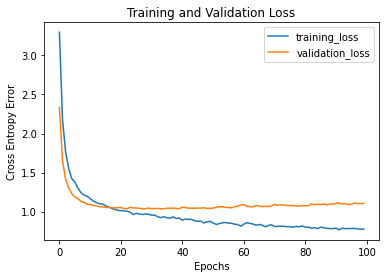

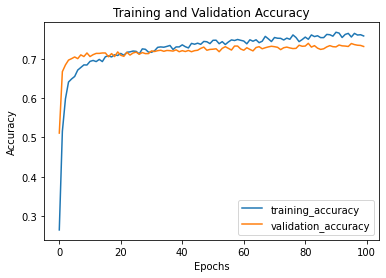

In [27]:
plt.plot(epochs, train_loss, label='training_loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Error')
plt.legend()

plt.figure()
plt.plot(epochs, train_acc, label='training_accuracy')
plt.plot(epochs, val_acc, label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()